  #                                                   INCOME ANALYSIS USING DEMOGRAPHIC DATA

## PROJECT OVERVIEW
- Income prediction is a crucial aspect of socioeconomic analysis.
- This dataset contains demographic and occupational infromation, including attributes such as **age,work class,education, marital status, occupation and hours worked per week,alongside the income bracket.**
- Given the demographic and occupational attributes in the dataset,can we accurately classify individuals into two income brackets.
* This project aims to analyze income levels based on demographic data. 

## BUSINESS UNDERSTANDING AND STAKEHOLDERS
* Understanding income distribution is crucial for policymakers, businesses, and researchers. 
* Potential stakeholders include:

  - **Government agencies**: To assess wage gaps and implement policies.
  - **Employers**: To understand salary trends and workforce demographics.
  - **Economists and researchers**: To analyze income inequality and labor market trends.


## OBJECTIVES
The primary objectives of this analysis are:

- To identify key factors affecting income levels.
- To analyze the relationship between education, occupation, and income.
- To explore any gender or racial disparities in earnings.
- To provide data-driven recommendations.
- Provide actionable insights for stakeholders.

## DATA UNDERSTANDING

- The data was sourced from [**Kaggle**](https://www.kaggle.com/datasets/rabailanees/adult-income-dataset)
- The dataset consists of demographic and income-related attributes, including:
  - **age**: Age of the individual.
  - **workclass**: Type of employment.
  - **fnlwgt**:
  - **education**: Highest level of education attained.
  - **education-num**: Number corresponding to the education attained
  - **marital-status**: 
  - **occupation**: Job role.
  - **relationship**:
  - **race**: Racial background
  - **Gender**: Either male or female
  - **Capital Gain**:Investments financial gain
  - **Capital Loss**:Investments financal loss
  - **hours-per-week**: Number of work hours per week.
  - **native-country**: Country of origin or residence
  - **salary**: Income category (<=50K or >50K).

**NOTE**
- In this work,I have used **salary,income and wage** interchangably to mean the same thing.

In [2]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data = pd.read_csv('adult11.csv')
# Display first few rows
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



## 5. Data Preparation and Cleaning

Steps taken:

1. Handling missing values (denoted by '?').
2. Converting numerical columns to appropriate data types.
3. Removing duplicates (if any).
4. Standardizing categorical values.


In [4]:
# Replace '?' with NaN
data.replace("?", pd.NA, inplace=True)

#drop NA values
data = data.dropna()
# Convert numerical columns to appropriate types
num_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
data[num_cols] = data[num_cols].apply(pd.to_numeric)

# Display dataset information after cleaning
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   gender          45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  salary          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## EXLPORATORY DATA ANALYSIS

We will perform:

- **Target variable analysis**: Distribution of salary categories.
- **Univariate analysis**: Distribution of individual variables.
- **Bivariate analysis**: Relationship between salary and other variables.
- **Multivariate analysis**: Correlations and interactions between multiple features.


### Target Variable Analysis

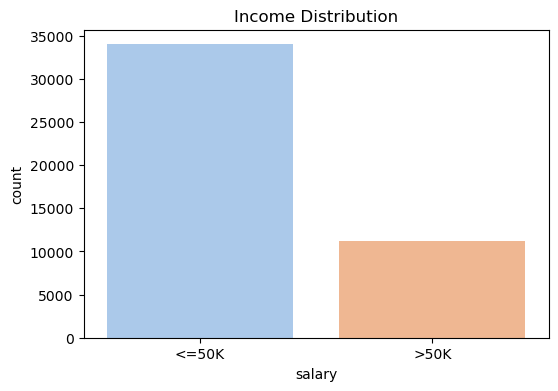

In [5]:
# Salary distribution
plt.figure(figsize=(6,4))
sns.countplot(x=data["salary"], palette="pastel")
plt.title("Income Distribution")
plt.show()


##### Explanation of the Target Variable Analysis
The objective of this analysis is to examine the distribution of the income classes(salary variable) and determine if the dataset is balanced.
* The dataset categorizes income ito two groups:
  1) **<=50K** - individuals earning 50,000 or less per year 
  2) **>50K** - individuals earning more than 50,000 
* The barchart of the saary variable shows that majority of individuals eran <=50K, indicating an imbalance in the dataset.
* This imbalance suggests that predictive models trained on this dataset may need balancing techniques like oversampling or undersampling to prevent bias.
  
**Findings**
* Most people in the dataset earn <=50K, and a significantly smaller portion earns >50K, which hints at **income disparity**



### Univariate Analysis

We examine distributions of key variables.


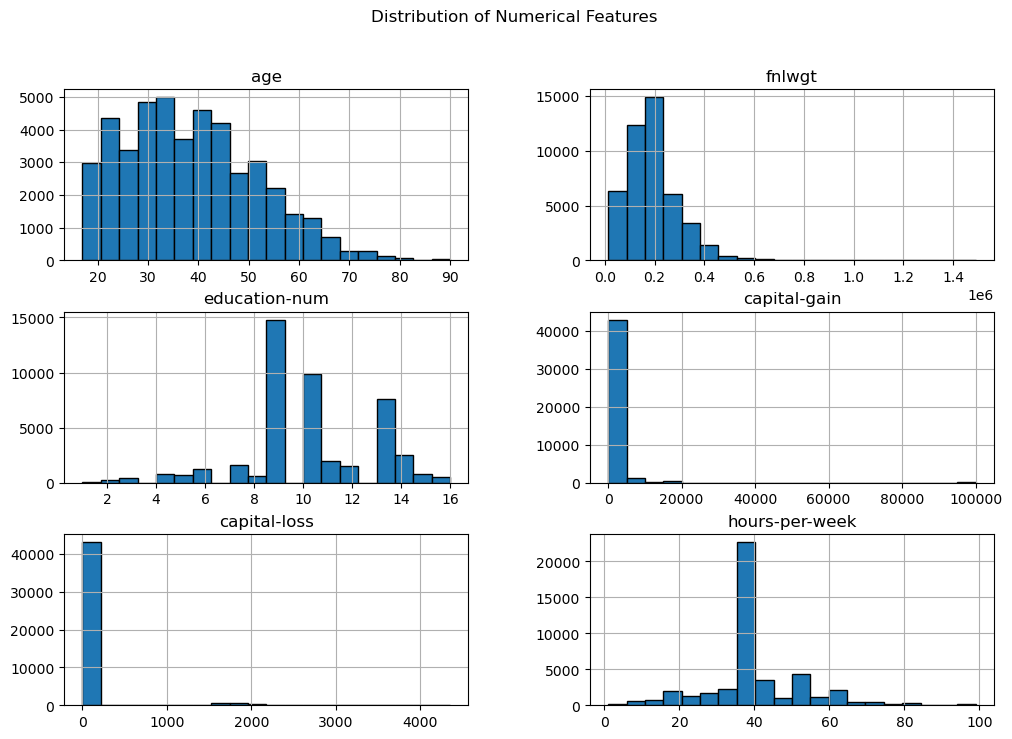

In [6]:

# Histograms for numerical variables
data[num_cols].hist(figsize=(12,8), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()


##### Explanation of Univariate Analysis
The **objective** is to explore the distribution of individual features 

a) **Age Distribution**
* The histogram for age reveals that most indiviuals fall between **20 and 50 years** - indicating that this is the most active ages in employmnet
* The dataset contains very few elderly individuals **(above 70 years)** suggesting that older individuals are either **retired or underrepresented**
  
b) **Education Level**
* The education variable shows a wide range of education levels from primary education to advanced degrees.
* A high number of individuals have a high school diploma(HS-grad) or some college experience, but fewer individuals have a Bachelor's or higher degree.

c) **Workclass**
* The workclass feature categorizes employment into government, private and selfemployed.
* A significant number of people work in the private sector,with fewer individuals in government jobd or self-employment.

d) **Capital Gain and Capital Loss**
* The capital-gain and capital-loss variables are highly skewed, meaning most individuals do not have significant capital gains or losses.
* Only a small portion of the dataset shows substantial investments in capital markets.

e) **Hours Worked per Week**
* Most people work between 35-45 hours per week,aligning with the standard full-time employment
* A small portion works extreme hours(more than 60 hours per week)

##### General findings
* Most people are **middle-aged,work in the private sector, and have a highchool diploma or some college experienc.**
* Few individuals experience **capital gains/losses**,indicating **limited investment participation.**
* The dataset is**skewed towards full-time employment.**


### Bivariate Analysis

Exploring relationships between salary and other features


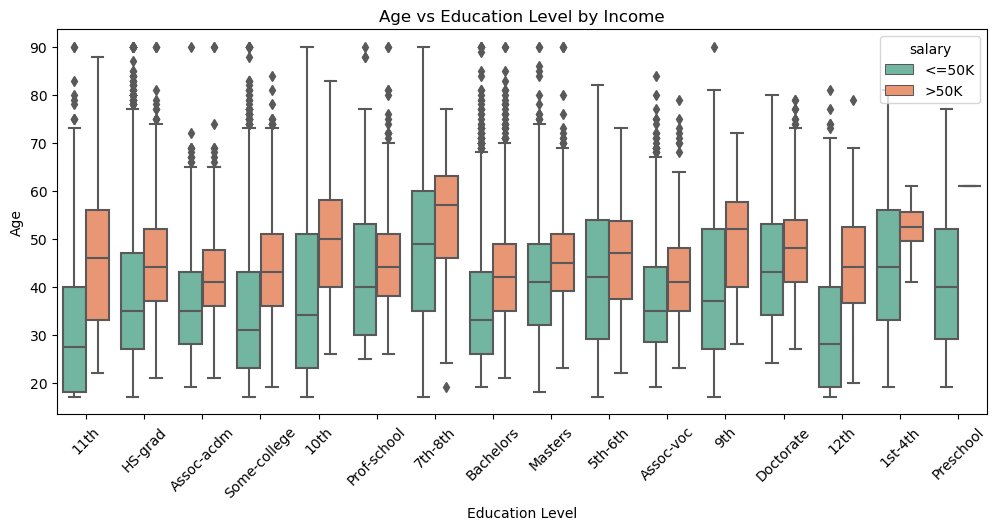

In [7]:
# Income vs Education
plt.figure(figsize=(12,5))
sns.boxplot(x="education", y="age", hue="salary", data=data, palette="Set2")
plt.xticks(rotation=45)
plt.title("Age vs Education Level by Income")
plt.xlabel("Education Level")
plt.ylabel('Age')
plt.legend(title='salary')
plt.show()


**Findings**
* The boxplot shows that individuals with higher education levels tend to have a higher median age and are more likely to earn >50K.
* People with Doctorates,Masters Degrees and bachelor degrees have the highest representation in the >50K salary category.
* In contrast, individuals with only a high school diploma or lower education are more likely to be in the <=50K group.

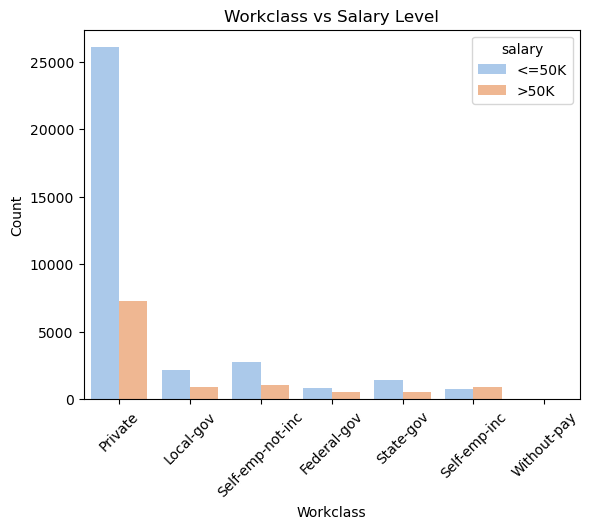

In [8]:
# Workclass vs salary
plt.figure(figure=(10,5))
sns.countplot(data=data,x='workclass',hue='salary',palette='pastel')
plt.xticks(rotation=45)
plt.title('Workclass vs Salary Level')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='salary')
plt.show()

**Finidngs**
* Self-employed individuals have a higher likelihood of earning >50K,possibly due to business ownership.

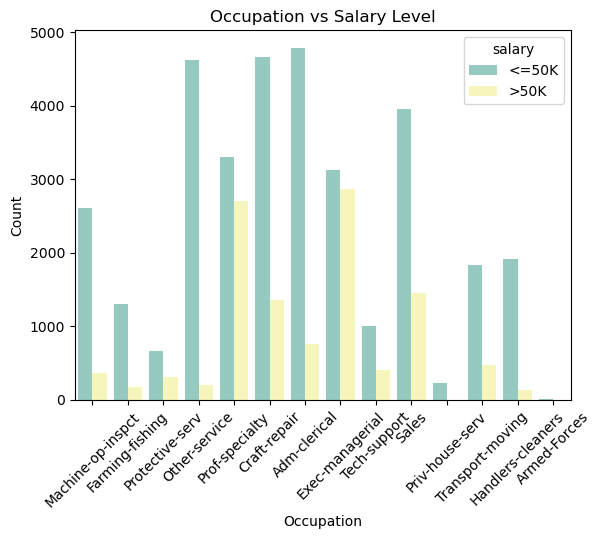

In [9]:
# Occupation vs Salary
plt.figure(figure=(14,6))
sns.countplot(data=data,x='occupation',hue='salary',palette='Set3')
plt.xticks(rotation=45)
plt.title('Occupation vs Salary Level')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='salary')
plt.show()

**Findings**
* Executivesand professional occupations have the highest proportion of >50K earners.


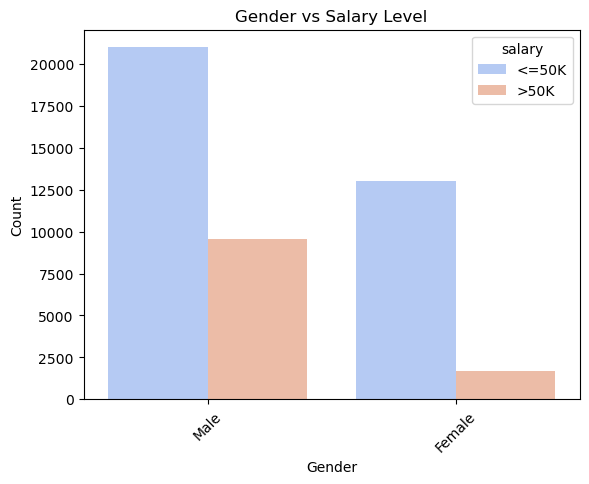

In [10]:
# Gender vs Salary
plt.figure(figure=(14,6))
sns.countplot(data=data,x='gender',hue='salary',palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Gender vs Salary Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='salary')
plt.show()

**Findings**
* Males are overrepresented in the >50K category while females are overrepresented in the <=50K group.
* This highlights a gender-biased income disparity, which could be due to occupation segregation,wage gaps, or work-hour differences.

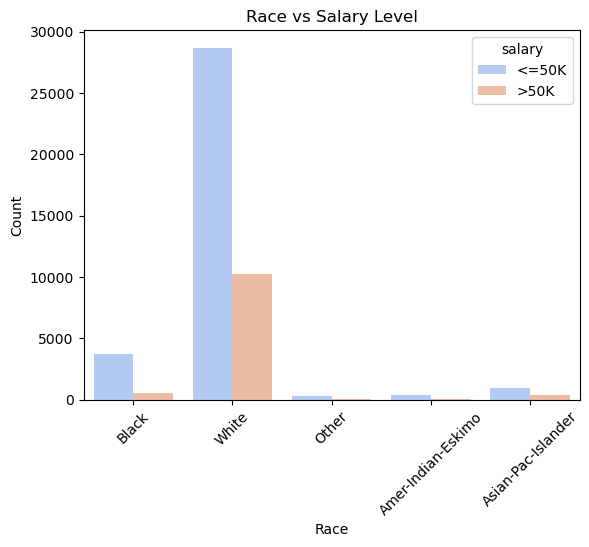

In [11]:
# Race vs Salary
plt.figure(figure=(10,5))
sns.countplot(data=data,x='race',hue='salary',palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Race vs Salary Level')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='salary')
plt.show()

**Findings**
* White individuals have a higher proportion in the >50K category compared to other racial groups (maybe due to sample size)
* While black and asian individuals have a lower representation in the >50K category,indicating potential racial income disparities.

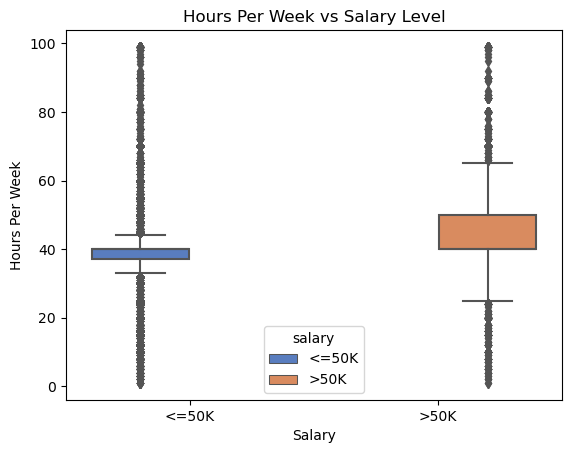

In [12]:
plt.figure(figure=(14,6))
sns.boxplot(data=data,x='salary',y='hours-per-week',hue='salary',palette='muted')
plt.title('Hours Per Week vs Salary Level')
plt.xlabel('Salary')
plt.ylabel('Hours Per Week')

plt.show()

**Findings**
* Individuals working longer hours have a higher probability of earning >50K.
* A positive correlation is observed: those working longer hours tend to have a higher likelihood of earning >50K.

### Multivariate Analysis


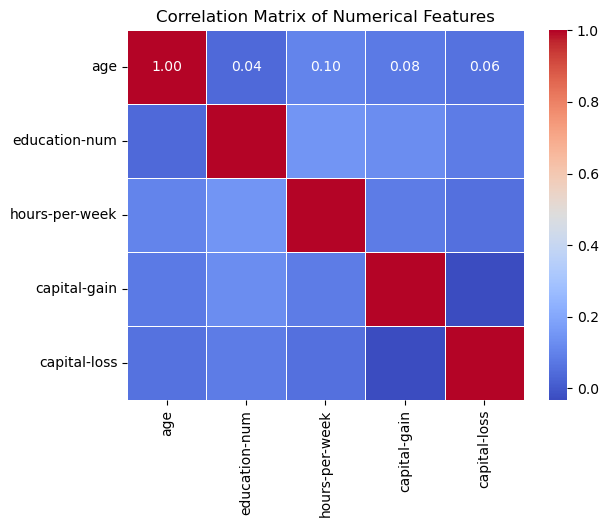

In [13]:
# Correlation heatmap(numerical features)
num_cols = ['age','education-num','hours-per-week','capital-gain','capital-loss']
corr_matrix = data[num_cols].corr()
plt.figure(figure=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Findings**
-
* Weak correlation between age and other variables


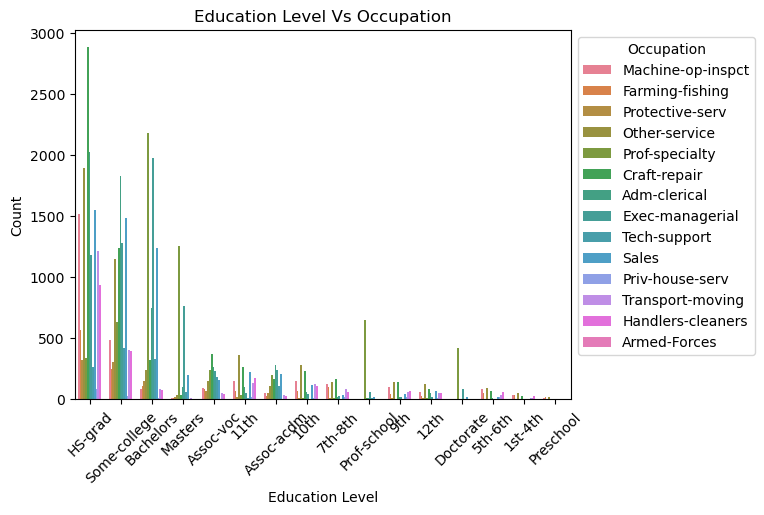

In [14]:
# Education,Occupation and Income
plt.figure(figure=(20,7))
sns.countplot(data=data,x='education',hue='occupation',palette='husl',order=data['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Education Level Vs Occupation')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Occupation',bbox_to_anchor=(1,1))
plt.show()

#### Findings
* Individuals with higher education tend to be in professional and executive roles, which leasds to higher income.
* Those with low education levels are concentrated in lower-paying jobs.

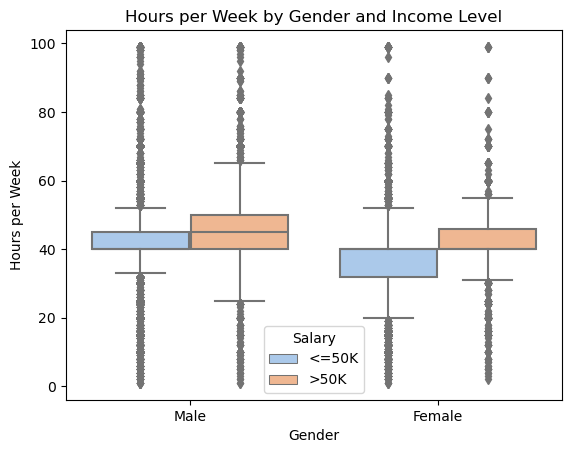

In [15]:
#Gender,Hours Worked and Income
plt.figure(figure=(10,6))
sns.boxplot(data=data,x='gender',y='hours-per-week',hue='salary',palette='pastel')
plt.title('Hours per Week by Gender and Income Level')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.legend(title='Salary')
plt.show()

**Findings**
* Even when working similar hours,males tend to earn more than females.

##### Multivariate Analysis findings
* Education plays a major role in job selection and salary.
* Gender wage disparity persists even when adjusting for work hours.
*  Higher education leads to better paying occupations,reinforcing income inequality for less-educated groups.

## CONCLUSIONS
1. **Education is the most significant factor influencing income.**
     * Individuals with Bachelor's degrees or higher are **far more likely to earn >50K** than those with only a highschool diploma
2. **Self-employment and government jobs offer better chances of earning >50K** compared to private-sector jobs
3. **Occupation type is critical for income level**
    * High-paying jobs:**Executives Professionals, and Tech-related roles**
    * Low-paying jobs:**Machine operators,Farming,Service jobs**
4. **Gender Disparity in incomes exist**
    * Women are significantly underrepresented in the >50K income category even when working similar hours.
5. **Race also affects income levels**
    * Black and Asian people have lower representaion in the >50K category of income compared to White individuals.
6. **Capital gains and losses are rare but significantly impact income**
   * Those who report capital gains/losses have a much higher chance of earning >50K,indicating that **investments and financial assets contribute to wealth.**

## RECOMMENDATIONS
1. **Promote higher education**
   * Policies should encourage affordable education programs and scholrships,especially for low-income groups
   * Companies should offer educational rembursement for employees to upskill
2. **Encourage self-employment and entrepreneurship**
   * Support for small businesses and startups through government grants and low-interest loans.
   * Financial literacy programs should be introduced to teach investment and capital growth strategies.
3. **Address gender-based income inequality**
   * Implement equal pay policies to ensure men and women are paid fairly for the same work.
   * Encourage women in leadership roles and STEM careers
4. **Target racial disparities**
   * Increase diversity in higher-paying jobs through mentorship and training programs.
   * Implement workplace policies that ensure equal opportunities for promotions and wage raises.
5. **Encourage financial literacy and investment**
   * Many individuals in the dataset do not benefit from capital gains or losses, suggesting a lack of investment knowledge.
   * Government and private sector should promote investment education programs.
